<a href="https://colab.research.google.com/github/hyojunyee/kita_2404/blob/main/m3_%EB%B6%84%EC%84%9D%20%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC/Task/Task_0605.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  아래 가이드에 따라서 1000명의 고객 구매데이터를 생성하고 아래사항을 수행하세요(관측치 10000개)

#### Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.
고객별 속성 데이터
- id : 1 ~ 1000 고객 번호
- gender : 0,1 정수 난수 생성
- age : 0 ~ 80사이 정수 난수 생성
- region : 1 ~ 10 사이 정수 난수 생성

거래 데이터
- no : 1 ~ 10000번 일련번호
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성
- price_21 : 1000 ~ 50000 사이 실수 난수 생성
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성
- time_20 : 01 ~ 24 사이 정수 난수 생성
- time_21 : 01 ~ 24 사이 정수 난수 생성
- amount_20 : price_20 * quantity_21
- amount_21 : price_21 * quantity_21

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)

In [ ]:
# 고객별 속성 데이터
customer_ids = np.arange(1, 1001)
genders = np.random.randint(0, 2, 1000)
ages = np.random.randint(0, 81, 1000)
regions = np.random.randint(1, 11, 1000)

customer_data = pd.DataFrame({
    'id': customer_ids,
    'gender': genders,
    'age': ages,
    'region': regions
})

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      1000 non-null   int64
 1   gender  1000 non-null   int64
 2   age     1000 non-null   int64
 3   region  1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [ ]:
# 거래 데이터
transaction_ids = np.arange(1, 10001)  # Transaction IDs from 1 to 10000
days_of_week = np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 10000)
dates = pd.to_datetime(np.random.choice(pd.date_range('2020-01-01', '2021-12-31'), 10000))

high_price_codes = [10]
mid_price_codes = [20]
low_price_codes = [30]

product_20 = np.random.choice(high_price_codes + mid_price_codes + low_price_codes, 10000)
product_21 = np.random.choice(high_price_codes + mid_price_codes + low_price_codes, 10000)

# 제품 카테고리에 따라 가격을 생성
def generate_price(product_code):
    if (product_code in high_price_codes):
        return round(np.random.uniform(30000, 50000), 2)
    elif (product_code in mid_price_codes):
        return round(np.random.uniform(15000, 29999), 2)
    elif (product_code in low_price_codes):
        return round(np.random.uniform(1000, 14999), 2)

price_20 = np.array([generate_price(code) for code in product_20])
price_21 = np.array([generate_price(code) for code in product_21])
quantity_20 = np.random.randint(1, 101, 10000)
quantity_21 = np.random.randint(1, 101, 10000)
time_20 = np.random.randint(1, 25, 10000)
time_21 = np.random.randint(1, 25, 10000)
amount_20 = price_20 * quantity_20
amount_21 = price_21 * quantity_21

transaction_data = pd.DataFrame({
    'no': transaction_ids,
    'day': days_of_week,
    'date': dates,
    'product_20': product_20,
    'product_21': product_21,
    'price_20': price_20,
    'price_21': price_21,
    'quantity_20': quantity_20,
    'quantity_21': quantity_21,
    'time_20': time_20,
    'time_21': time_21,
    'amount_20': amount_20,
    'amount_21': amount_21
})

In [ ]:
# 고객 속성을 거래 데이터에 통합
# 각 거래에 임의의 고객 ID를 할당
transaction_data['customer_id'] = np.random.choice(customer_ids, 10000)

In [ ]:
# # 'customer_id'에 대한 거래 데이터와 고객 데이터를 병합
# df = transaction_data.merge(customer_data, how='left', left_on='customer_id', right_on='id')

In [ ]:
df = customer_data.merge(transaction_data, how='left', left_on='id', right_on='customer_id')

In [ ]:
# cols = list(customer_data.columns) + [col for col in merged_df.columns if col not in customer_data.columns]
# merged_df = merged_df[cols]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           10000 non-null  int64         
 1   gender       10000 non-null  int64         
 2   age          10000 non-null  int64         
 3   region       10000 non-null  int64         
 4   no           10000 non-null  int64         
 5   day          10000 non-null  object        
 6   date         10000 non-null  datetime64[ns]
 7   product_20   10000 non-null  int64         
 8   product_21   10000 non-null  int64         
 9   price_20     10000 non-null  float64       
 10  price_21     10000 non-null  float64       
 11  quantity_20  10000 non-null  int64         
 12  quantity_21  10000 non-null  int64         
 13  time_20      10000 non-null  int64         
 14  time_21      10000 non-null  int64         
 15  amount_20    10000 non-null  float64       
 16  amoun

In [ ]:
df.head()

,id,gender,age,region,no,day,date,product_20,product_21,price_20,price_21,quantity_20,quantity_21,time_20,time_21,amount_20,amount_21,customer_id
0,1,0,62,8,2795,Monday,2021-07-26,20,20,19169.47,19879.92,70,53,17,5,1341862.90,1053635.76,1
1,1,0,62,8,2913,Monday,2021-07-10,10,20,41002.42,28802.14,12,5,9,5,492029.04,144010.70,1
2,1,0,62,8,3959,Monday,2021-10-13,30,20,2586.66,17190.65,90,24,21,8,232799.40,412575.60,1
3,1,0,62,8,6233,Wednesday,2020-02-16,30,10,5392.45,34798.29,57,40,8,17,307369.65,1391931.60,1
4,1,0,62,8,7724,Friday,2020-05-17,10,10,49451.52,40760.84,21,7,10,23,1038481.92,285325.88,1


In [ ]:
from matplotlib import pyplot as plt


,id,gender,age,region,no,day,date,product_20,product_21,price_20,price_21,quantity_20,quantity_21,time_20,time_21,amount_20,amount_21,customer_id
0,1,0,62,8,2795,Monday,2021-07-26,20,20,19169.47,19879.92,70,53,17,5,1341862.90,1053635.76,1
1,1,0,62,8,2913,Monday,2021-07-10,10,20,41002.42,28802.14,12,5,9,5,492029.04,144010.70,1
2,1,0,62,8,3959,Monday,2021-10-13,30,20,2586.66,17190.65,90,24,21,8,232799.40,412575.60,1
3,1,0,62,8,6233,Wednesday,2020-02-16,30,10,5392.45,34798.29,57,40,8,17,307369.65,1391931.60,1
4,1,0,62,8,7724,Friday,2020-05-17,10,10,49451.52,40760.84,21,7,10,23,1038481.92,285325.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1000,0,73,2,7095,Tuesday,2020-10-29,10,20,33531.58,17243.62,44,54,2,5,1475389.52,931155.48,1000
9996,1000,0,73,2,7984,Wednesday,2020-09-06,10,30,48342.79,1269.79,23,9,1,16,1111884.17,11428.11,1000
9997,1000,0,73,2,8126,Tuesday,2021-12-06,20,10,18584.22,36240.77,36,54,22,8,669031.92,1957001.58,1000
9998,1000,0,73,2,8221,Friday,2021-10-17,10,10,41819.07,47594.89,60,80,18,17,2509144.20,3807591.20,1000


#### Q2. df를 수정하여 5가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요

region
1      93
2     109
3      90
4     107
5     110
6     101
7      99
8      92
9      97
10    102
Name: id, dtype: int64


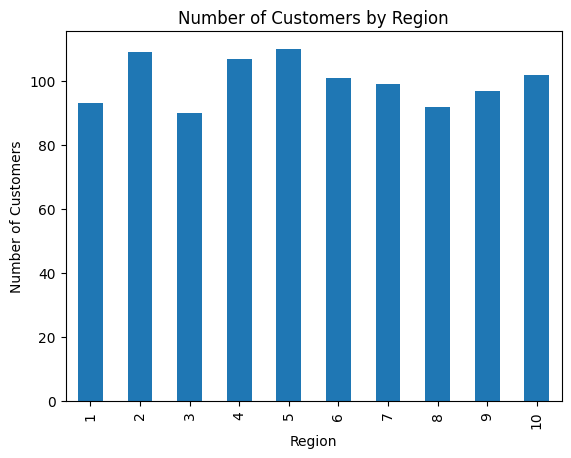

In [ ]:
# 지역별 고객 수
customer_count_by_region = df.groupby('region')['id'].nunique()

customer_count_by_region.plot(kind='bar', xlabel='Region', ylabel='Number of Customers', title='Number of Customers by Region')

print(customer_count_by_region)

In [ ]:
# 총 판매량 칼럼 만들어주기
df['total_amount'] = df['amount_20'] + df['amount_21']

Text(0.5, 1.0, 'Total Sales Amount by Region')

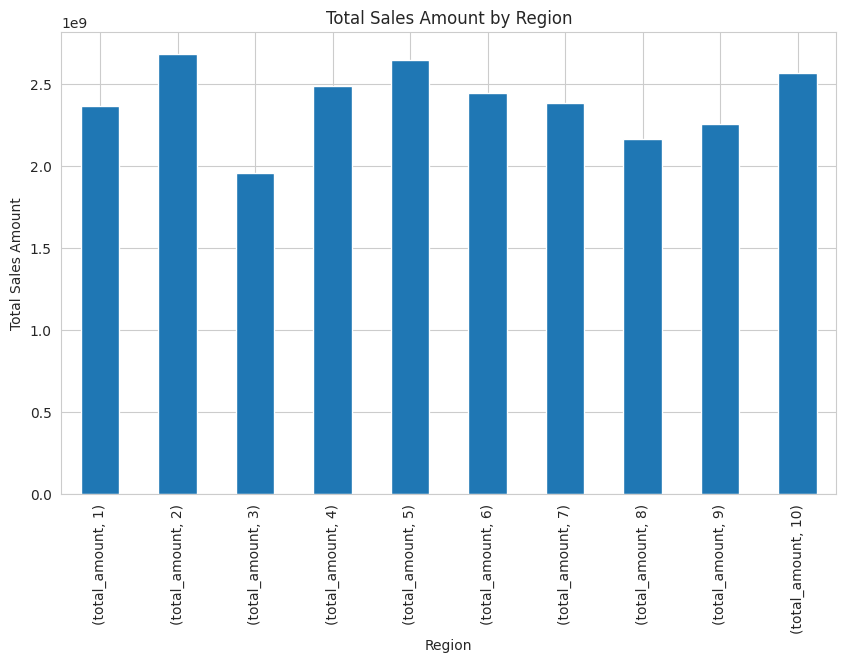

In [ ]:
# 지역별 그룹화 및 총 매출액
total_sales_by_region = df.groupby(['region'])[['total_amount']].sum()

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
total_sales_by_region.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Region')

In [ ]:
# 가격대별 제품 분류
def categorize_price(product_code):
    if product_code == 10:
        return 'High-end'
    elif product_code == 20:
        return 'Mid-priced'
    else:
        return 'Low-priced'

df['price_range'] = df['product_20'].apply(categorize_price)
df['price_range']

0       Mid-priced
1         High-end
2       Low-priced
3       Low-priced
4         High-end
           ...    
9995      High-end
9996      High-end
9997    Mid-priced
9998      High-end
9999    Low-priced
Name: price_range, Length: 10000, dtype: object

Text(0.5, 1.0, 'Total Sales Amount by Region and Price Range')

<Figure size 1000x600 with 0 Axes>

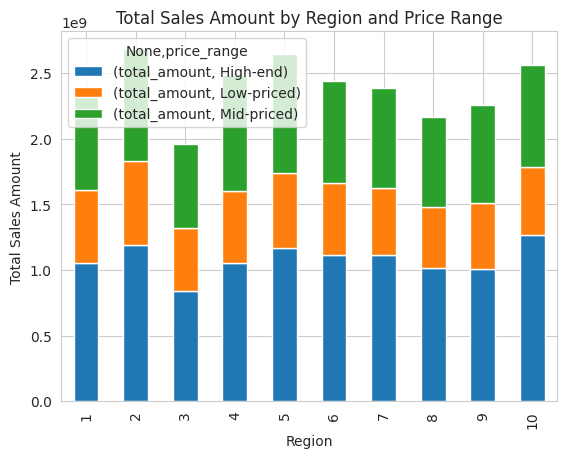

In [ ]:
# 지역별, 상품별 그룹화 및 총 판매량 계산
sales_by_region_and_price = df.groupby(['region', 'price_range'])[['total_amount']].sum()

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sales_by_region_and_price.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Region and Price Range')

In [ ]:
# 나이대별 그룹 만들어주기
df['age_group'] = pd.cut(df['age'], bins=range(0, 81, 10), labels=[f"{i}-{i+9}" for i in range(0, 80, 10)])

In [ ]:
# df.drop(['age_group'], axis=1, inplace=True)

Text(0.5, 1.0, 'Sales_By_Age')

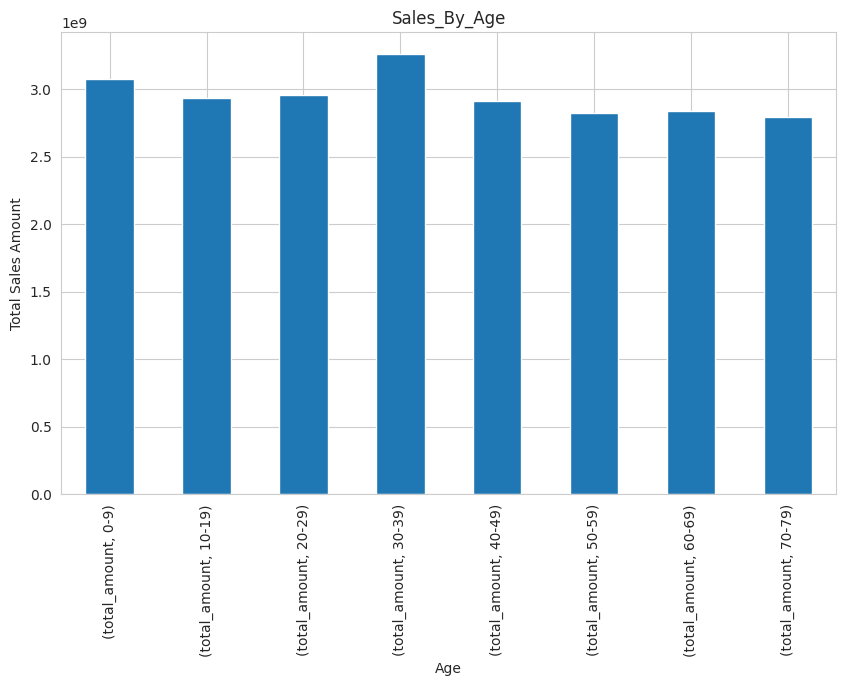

In [ ]:
# 연령별, 지역별 그룹화 및 총 매출액
sales_by_age = df.groupby(['age_group'])[['total_amount']].sum()

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sales_by_age.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Age')
plt.ylabel('Total Sales Amount')
plt.title('Sales_By_Age')

In [ ]:
df['n_gender'] = df['gender'].replace({0: 'Male', 1: 'Female'})

<Figure size 800x600 with 0 Axes>

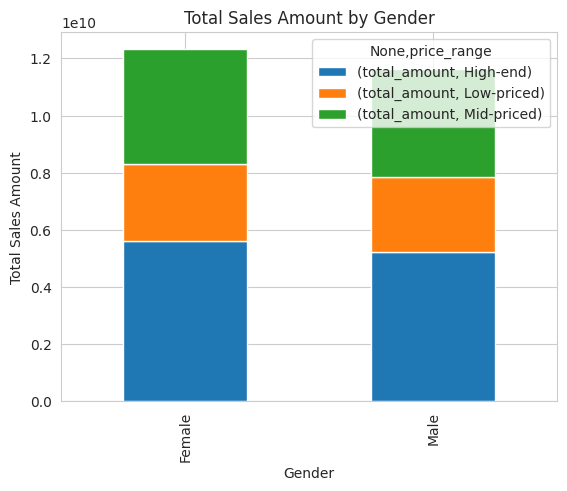

In [ ]:
# 성별로 그룹핑하여 총 매출액 계산
sales_by_gender = df.groupby(['n_gender','price_range'])[['total_amount']].sum()

plt.figure(figsize=(8, 6))
sales_by_gender.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Gender')
plt.show()

#### Q3. df 를 탐색적 분석을 통하여 인사이트를 도출하세요.